In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import joblib as jb

In [4]:
df=pd.read_csv('HousingData.csv')

# Conversion

In [5]:
for i in df.index:
    if df.loc[i,'furnishingstatus']=="furnished":
        df.loc[i,'furnishingstatus']=2
    elif  df.loc[i,'furnishingstatus']=="semi-furnished":
        df.loc[i,'furnishingstatus']=1
    else:
        df.loc[i,'furnishingstatus']=0


In [6]:
for i in df.index:
    if df.loc[i,'mainroad']=="yes":
        df.loc[i,'mainroad']=1
    else:
        df.loc[i,'mainroad']=0


In [7]:
for i in df.index:
    if df.loc[i,'guestroom']=="yes":
        df.loc[i,'guestroom']=1
    else:
        df.loc[i,'guestroom']=0


In [8]:
for i in df.index:
    if df.loc[i,'basement']=="yes":
        df.loc[i,'basement']=1
    else:
        df.loc[i,'basement']=0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Algorithm

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [26]:
x=newdf[['area','bedrooms','bathrooms','stories','mainroad','guestroom','parking','furnishingstatus']]
y=newdf['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.5947143168343144


In [50]:
x=updf[['area']]
y=updf['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.14156042356695608


In [27]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
x=newdf[['area','bedrooms','bathrooms','mainroad','stories','guestroom','furnishingstatus']]
y=newdf['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=RandomForestRegressor()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

In [53]:
from xgboost import XGBRegressor

In [54]:
x=updf[['area','bedrooms','bathrooms','stories']]
y=updf['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=XGBRegressor()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.3270229697227478


# convertin .py to .pkl

In [101]:
jb.dump(model,"house.pkl")

['house.pkl']

# Price and Area

In [11]:
import seaborn as sns

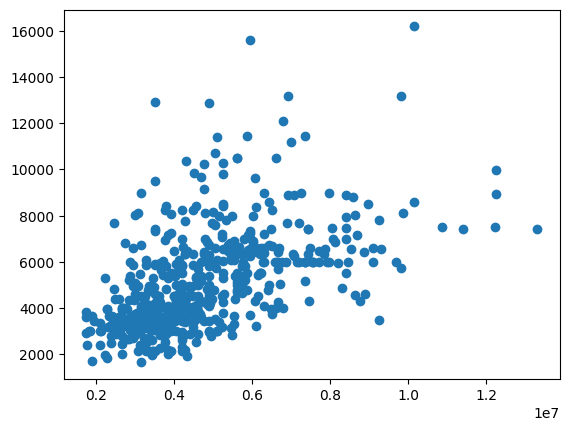

In [12]:
plt.plot(df['price'],df['area'],'o')
plt.show()

C:\Users\swapn\AppData\Local\Temp\ipykernel_33984\3698975012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\swapn\AppData\Local\Temp\ipykernel_33984\3698975012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


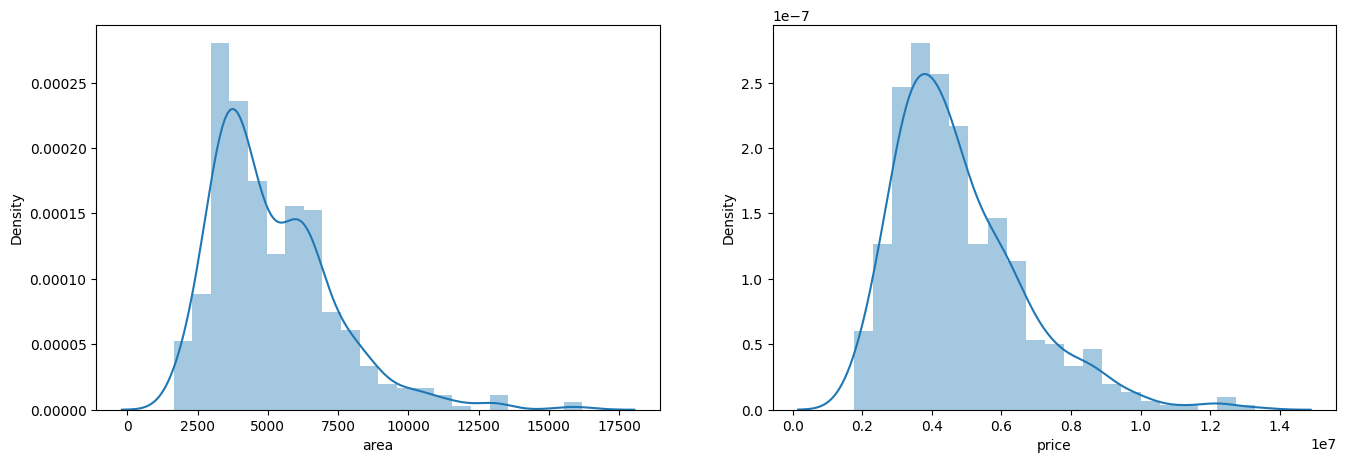

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['area'])
plt.subplot(1,2,2)
sns.distplot(df['price'])
plt.show()

<Axes: ylabel='price'>

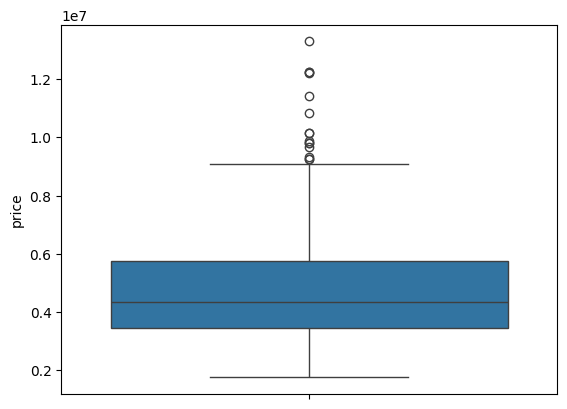

In [14]:
sns.boxplot(df['price'])

# IQR

In [16]:
q31=df['price'].quantile(0.75)
q11=df['price'].quantile(0.25)
iqr1=q31-q11
ul=q31+1.5*iqr1
ll=q11-1.5*iqr1
print(ul,ll)

9205000.0 -35000.0


In [17]:
ndf=df[df['price']<ul]


C:\Users\swapn\AppData\Local\Temp\ipykernel_33984\2640624899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ndf['area'])
C:\Users\swapn\AppData\Local\Temp\ipykernel_33984\2640624899.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ndf['price'])


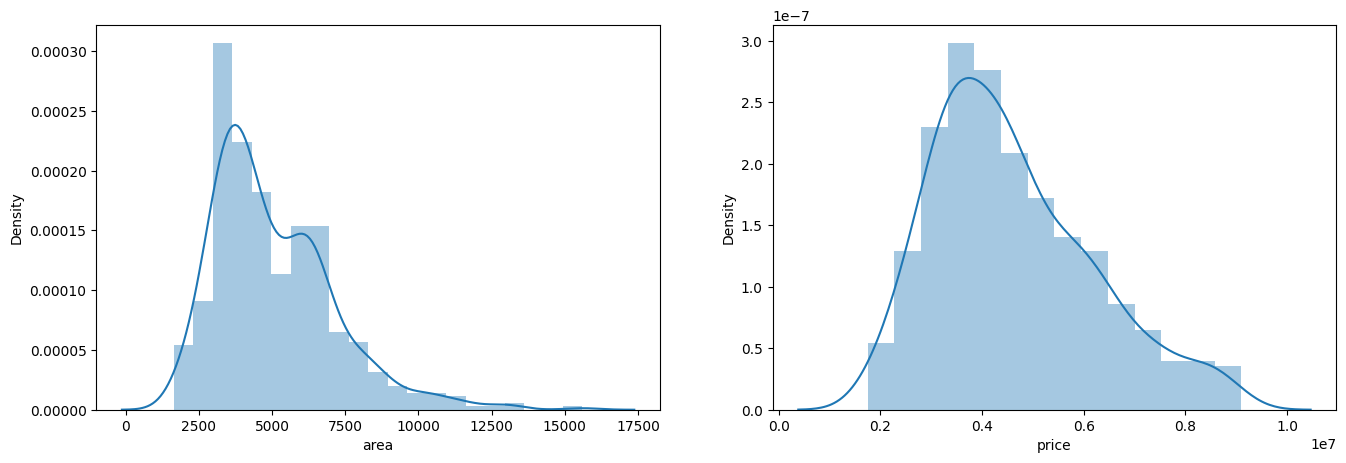

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(ndf['area'])
plt.subplot(1,2,2)
sns.distplot(ndf['price'])
plt.show()

In [19]:
q3=df['area'].quantile(0.75)
q1=df['area'].quantile(0.25)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
print(ul,ll)

10500.0 -540.0


In [20]:
nndf=df[df['area']<ul]


In [21]:
newdf=pd.concat([ndf,nndf],ignore_index=True)

In [22]:
newdf.shape

(1060, 13)

In [23]:
newdf=newdf.reset_index()

C:\Users\swapn\AppData\Local\Temp\ipykernel_33984\1218185931.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['area'])
C:\Users\swapn\AppData\Local\Temp\ipykernel_33984\1218185931.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['price'])


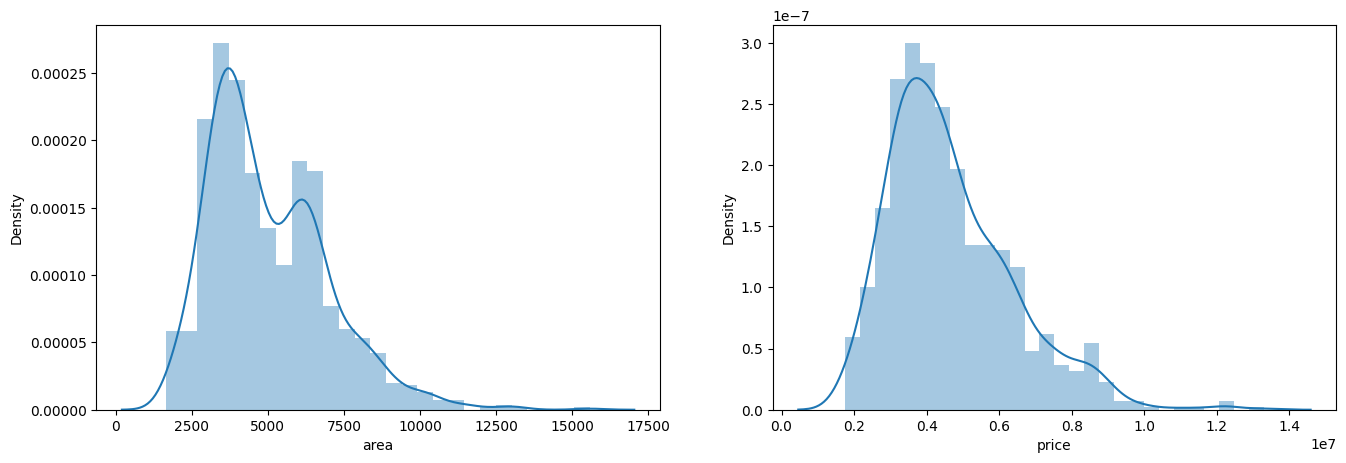

In [24]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(newdf['area'])
plt.subplot(1,2,2)
sns.distplot(newdf['price'])
plt.show()

In [25]:
updf=df[(df['area']<ul) & (df['price']<ul)]

NameError: name 'ul1' is not defined

In [29]:
updf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             517 non-null    int64 
 1   area              517 non-null    int64 
 2   bedrooms          517 non-null    int64 
 3   bathrooms         517 non-null    int64 
 4   stories           517 non-null    int64 
 5   mainroad          517 non-null    object
 6   guestroom         517 non-null    object
 7   basement          517 non-null    object
 8   hotwaterheating   517 non-null    object
 9   airconditioning   517 non-null    object
 10  parking           517 non-null    int64 
 11  prefarea          517 non-null    object
 12  furnishingstatus  517 non-null    object
dtypes: int64(6), object(7)
memory usage: 56.5+ KB


C:\Users\swapn\AppData\Local\Temp\ipykernel_2208\3804590010.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(updf['area'])
C:\Users\swapn\AppData\Local\Temp\ipykernel_2208\3804590010.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(updf['price'])


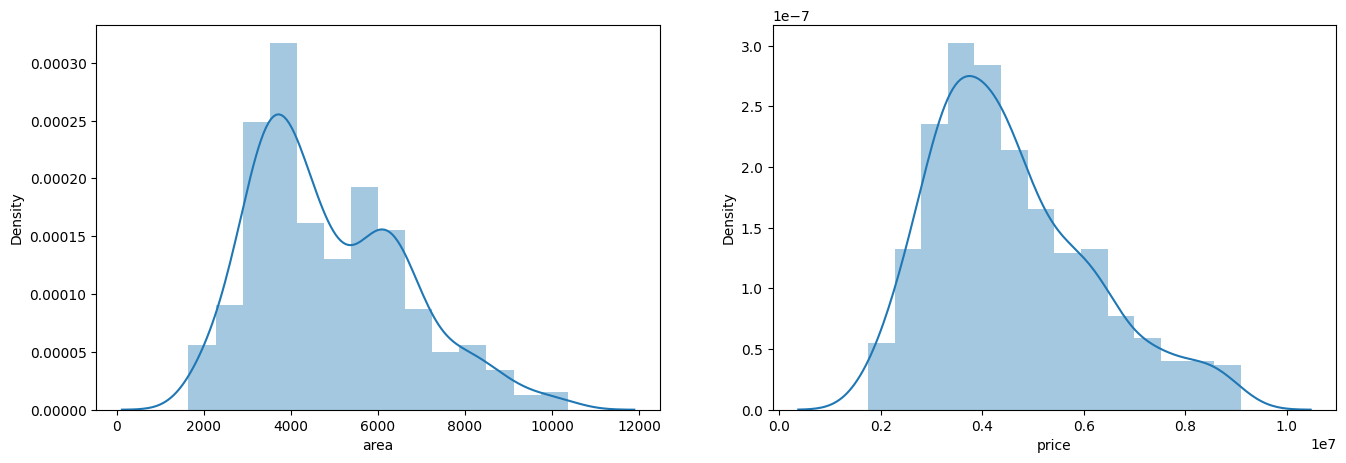

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(updf['area'])
plt.subplot(1,2,2)
sns.distplot(updf['price'])
plt.show()

In [31]:
newdf.duplicated().sum()

np.int64(0)

In [32]:
x=df[df['area']>8000]

In [33]:
x['area'].mean()

np.float64(9812.037735849057)

# Bedrooms

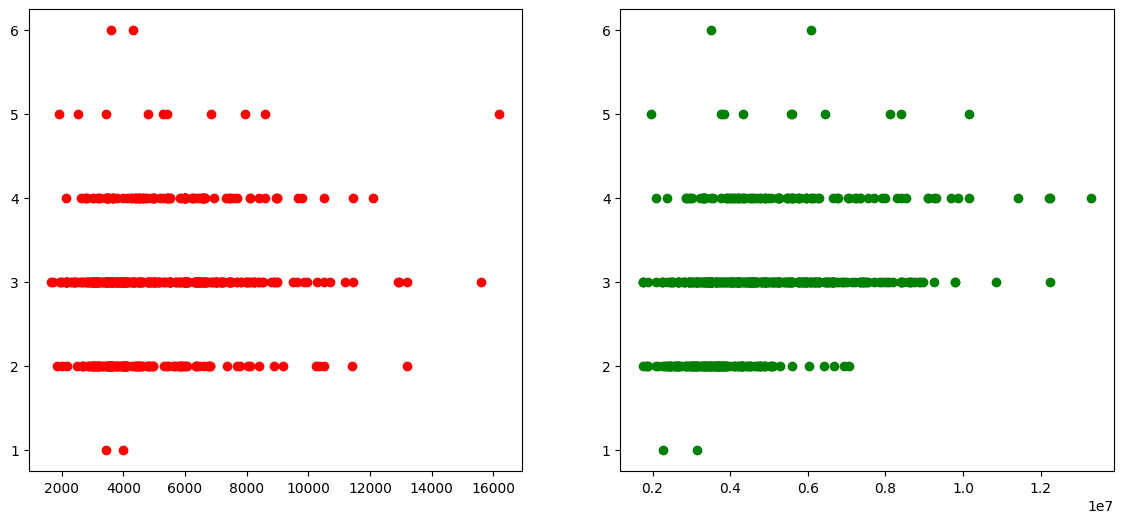

In [34]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(df['area'],df['bedrooms'],'o',color="Red")
plt.subplot(1,2,2)
plt.plot(df['price'],df['bedrooms'],'o',color="Green")
plt.show()

# Bathrooms

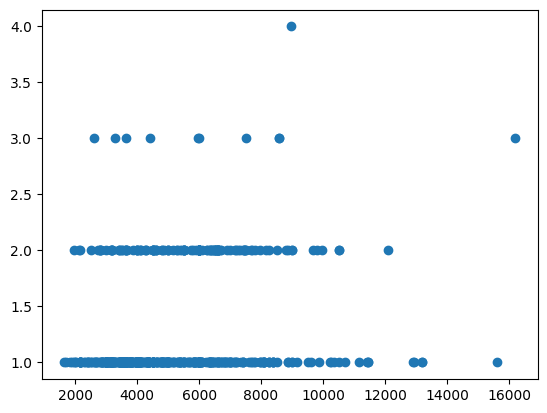

In [35]:
plt.plot(df['area'],df['bathrooms'],'o')
plt.show()

# Stories

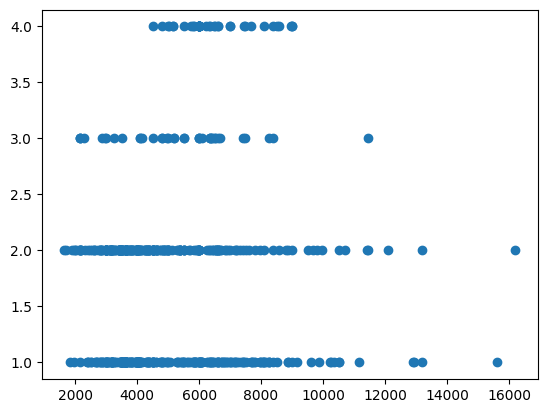

In [36]:
plt.plot(df['area'],df['stories'],'o')
plt.show()

In [37]:
x=df[df['stories']==1]
me=int(x['area'].mean())
for i in df.index:
    if df.loc[i,'stories']==1:
        if df.loc[i,'area']>9000:
            df.loc[i,'area']=me


In [38]:
x=df[df['stories']==2]
me=int(x['area'].mean())
for i in df.index:
    if df.loc[i,'stories']==2:
        if df.loc[i,'area']>8300:
            df.loc[i,'area']=me


# Parking

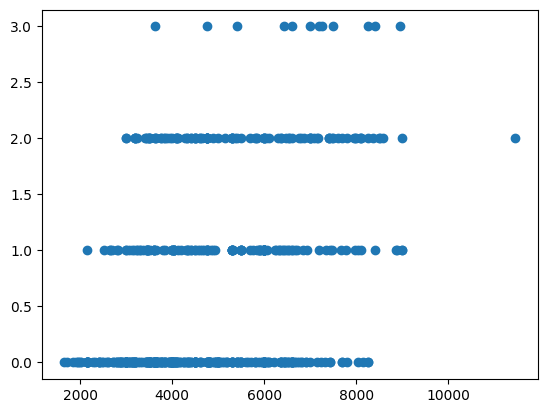

In [39]:
plt.plot(df['area'],df['parking'],'o')
plt.show()

In [40]:
for i in df.index:
    if df.loc[i,'parking']==0:
        if df.loc[i,'area']>14000:
            df.loc[i,'area']=None
df.dropna(inplace=True)

In [41]:
x=df[df['parking']==0]
me=int(x['area'].mean())
for i in df.index:
    if df.loc[i,'parking']==0:
        if df.loc[i,'area']>9000:
            df.loc[i,'area']=me


In [42]:
for i in df.index:
    if df.loc[i,'parking']==1:
        if df.loc[i,'area']>12000:
            df.loc[i,'area']=None
df.dropna(inplace=True)

In [43]:
x=df[df['parking']==1]
me=int(x['area'].mean())
for i in df.index:
    if df.loc[i,'parking']==1:
        if df.loc[i,'area']>8500:
            df.loc[i,'area']=me


In [44]:
for i in df.index:
    if df.loc[i,'parking']==2:
        if df.loc[i,'area']>14000:
            df.loc[i,'area']=None
df.dropna(inplace=True)

In [45]:
x=df[df['parking']==2]
me=int(x['area'].mean())
for i in df.index:
    if df.loc[i,'parking']==2:
        if df.loc[i,'area']>10500:
            df.loc[i,'area']=me


In [46]:
x=df[df['parking']==3]
me=int(x['area'].mean())
for i in df.index:
    if df.loc[i,'parking']==3:
        if df.loc[i,'area']<6000:
            df.loc[i,'area']=me
